<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/Datenanalyse/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Skript um erste Zsammenhänge in den Messdaten und Vorhersagedaten zu finden:
Dateiname: EDA

## Verbinden mit der Google Drive und Import der benötigten Module:

In [1]:
# Verbinden mit der Google-Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## import modules

import io, os, sys, setuptools, tokenize
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
from datetime import timedelta
from math import sqrt

In [3]:
# Größe der Plots festlegen
matplotlib.rcParams['figure.figsize'] = (16, 9)

In [4]:
# Allgemeine Angaben
latitude = 50.2
longitude = 7.8

seconds_in_day = 24*60*60
seconds_in_year = (365.2425)*seconds_in_day

# tz, altitude, name = 'Europe/Berlin', 70, 'SanktAugustin'
# tus = pvlib.location.Location(latitude, longitude, tz, altitude, name)

In [5]:
# Pfad zur CSV-Datei auf Google Drive
name_Messwerte = 'Messdaten_CAMS_GHI.csv'
name_Vorhersage = 'Vorhersagedaten_CAMS_VarIdx.csv'

folder_import = '/content/drive/My Drive/Colab_Notebooks/Clean_Data/'
folder_export = '/content/drive/My Drive/Colab_Notebooks/plot_daily_UVI/'

## Import der Vorhersagewerte:

In [6]:
df_Vorhersage = pd.read_csv(folder_import + name_Vorhersage)
df_Vorhersage.set_index('Datetime', inplace=True)
df_Vorhersage.index = pd.to_datetime(df_Vorhersage.index)

## Import der Messwerte:

In [7]:
df_Messwerte = pd.read_csv(folder_import + name_Messwerte)
df_Messwerte.set_index('Datetime', inplace=True)
df_Messwerte.index = pd.to_datetime(df_Messwerte.index)

Allgemeine Informationen über die Vorhersagewerte und Messwerte:

In [8]:
print(df_Vorhersage.describe(),
df_Vorhersage.isna().sum())

             aod469        aod550         gtco3         uvbed       uvbedcs  \
count  10224.000000  10224.000000  10224.000000  1.022400e+04  1.022400e+04   
mean       0.193068      0.158245      0.006973  8.174907e-01  1.083072e+00   
std        0.144147      0.118452      0.000769  1.493487e+00  1.829005e+00   
min        0.021603      0.017586      0.004843 -5.551115e-16 -5.551115e-16   
25%        0.093358      0.076800      0.006484  0.000000e+00  0.000000e+00   
50%        0.149364      0.122642      0.006922  2.699899e-02  4.136721e-02   
75%        0.251221      0.205252      0.007391  9.022764e-01  1.384716e+00   
max        1.345396      1.122722      0.010138  7.965581e+00  7.983141e+00   

                hcc           lcc           tcc  index_sigma  index_coimbra  \
count  10224.000000  10224.000000  10224.000000  1496.000000    1496.000000   
mean       0.421584      0.375480      0.678987     0.025037       0.129958   
std        0.432544      0.412021      0.386534    

In [9]:
print(df_Messwerte.describe(),
df_Messwerte.isna().sum())

          Unnamed: 0  Clear_sky_GHI  Clear_sky_BHI           GHI  \
count   96768.000000   96768.000000   96768.000000  96768.000000   
mean   138146.213790     125.656372      94.075683     83.776546   
std     91930.488468      89.862801      75.058723     80.503671   
min     10300.000000       0.000000       0.000000      0.000000   
25%     57128.750000      51.207250      30.493000     11.329400   
50%    118347.500000     111.691500      80.632500     61.623000   
75%    202528.250000     199.722250     154.774000    132.409500   
max    319858.000000     310.509000     270.874000    310.509000   

                BHI           UVI           UVA           UVB       erythem  \
count  96768.000000  96768.000000  96768.000000  96768.000000  96768.000000   
mean      41.535961      1.338296      2.543840    139.607354      0.033457   
std       63.894750      1.672783      3.294279    131.374244      0.041820   
min        0.000000      0.000000      0.000000      0.000000      0.00

## Outliner finden:

In [10]:
# Interquartile Range berechnen

Q1_UVI = df_Messwerte['UVI'].quantile(0.25)
Q2_UVI = df_Messwerte['UVI'].quantile(0.5)
Q3_UVI = df_Messwerte['UVI'].quantile(0.75)

IQR_UVI = Q3_UVI - Q1_UVI

print(f"25. Perzentil: {round(Q1_UVI, 3)}, 5. Perzentil: {round(Q2_UVI, 3)}, 75. Perzentil: {round(Q3_UVI, 3)}, IQR: {round(IQR_UVI, 3)}")

25. Perzentil: 0.153, 5. Perzentil: 0.596, 75. Perzentil: 1.903, IQR: 1.75


In [11]:
# Z-score über alle Messdaten berechnen

df_ZScore = pd.DataFrame()

mittelwert = df_Messwerte['UVI'].mean()
standardabweichung = df_Messwerte['UVI'].std()

df_ZScore['Z-Score'] = (df_Messwerte['UVI'] - mittelwert) / standardabweichung
plt.plot(df_ZScore)
plt.title('Z-Score des UVI')
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Z_Score_UVI.png')
plt.close()

## Plotten des Dataframes:

In [12]:
# Plot der Erythem-Tagessumme
df_Messwerte.groupby('Date').sum()[['erythem']].plot()
plt.title('Plot der Erythem-Tagessumme');
plt.xticks(rotation=45)
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Erythem_Tagessumme.png')
plt.close()

## Univariante Analyse:

In [13]:
print(df_Vorhersage.dtypes, df_Messwerte.dtypes)

aod469           float64
aod550           float64
gtco3            float64
uvbed            float64
uvbedcs          float64
hcc              float64
lcc              float64
tcc              float64
index_sigma      float64
index_coimbra    float64
index_stein      float64
kc               float64
dtype: object Unnamed: 0              int64
Observation_period     object
Clear_sky_GHI         float64
Clear_sky_BHI         float64
GHI                   float64
BHI                   float64
UVI                   float64
UVA                   float64
UVB                   float64
erythem               float64
Datum                  object
Uhrzeit                object
Messzeitpunkt         float64
ghi                   float64
Dif                   float64
Glo_SPLite            float64
Dir                   float64
Temp                  float64
DiffGreater2            int64
SZA                   float64
time_sin              float64
time_cos              float64
date_sin              floa

In [14]:
round(df_Vorhersage.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
aod469,10224.0,0.19,0.14,0.02,0.09,0.15,0.25,1.35
aod550,10224.0,0.16,0.12,0.02,0.08,0.12,0.21,1.12
gtco3,10224.0,0.01,0.00,0.00,0.01,0.01,0.01,0.01
uvbed,10224.0,0.82,1.49,-0.00,0.00,0.03,0.90,7.97
uvbedcs,10224.0,1.08,1.83,-0.00,0.00,0.04,1.38,7.98
hcc,10224.0,0.42,0.43,0.00,0.00,0.22,0.96,1.00
lcc,10224.0,0.38,0.41,0.00,0.00,0.16,0.87,1.00
tcc,10224.0,0.68,0.39,0.00,0.30,0.93,1.00,1.00
index_sigma,1496.0,0.03,0.17,0.00,0.00,0.01,0.01,4.01
index_coimbra,1496.0,0.13,0.40,0.00,0.02,0.06,0.16,8.38


In [15]:
round(df_Messwerte.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,96768.0,138146.21,91930.49,10300.00,57128.75,118347.50,202528.25,319858.00
Clear_sky_GHI,96768.0,125.66,89.86,0.00,51.21,111.69,199.72,310.51
Clear_sky_BHI,96768.0,94.08,75.06,0.00,30.49,80.63,154.77,270.87
GHI,96768.0,83.78,80.50,0.00,11.33,61.62,132.41,310.51
BHI,96768.0,41.54,63.89,0.00,0.00,1.07,62.20,270.87
UVI,96768.0,1.34,1.67,0.00,0.15,0.60,1.90,8.54
UVA,96768.0,2.54,3.29,0.00,0.18,1.02,3.72,16.14
UVB,96768.0,139.61,131.37,0.00,34.83,96.57,208.39,647.71
erythem,96768.0,0.03,0.04,0.00,0.00,0.01,0.05,0.21
Messzeitpunkt,96768.0,40427.59,13433.36,12360.00,29520.00,40560.00,51300.00,68220.00


In [16]:
# Prüfen, ob es Nullwerte in den Daten gibt
print(df_Vorhersage.info(), '\n --------------------- \n', df_Vorhersage.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10224 entries, 2022-06-01 00:00:00 to 2023-07-31 23:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   aod469         10224 non-null  float64
 1   aod550         10224 non-null  float64
 2   gtco3          10224 non-null  float64
 3   uvbed          10224 non-null  float64
 4   uvbedcs        10224 non-null  float64
 5   hcc            10224 non-null  float64
 6   lcc            10224 non-null  float64
 7   tcc            10224 non-null  float64
 8   index_sigma    1496 non-null   float64
 9   index_coimbra  1496 non-null   float64
 10  index_stein    1496 non-null   float64
 11  kc             1496 non-null   float64
dtypes: float64(12)
memory usage: 1.0 MB
None 
 --------------------- 
 aod469              0
aod550              0
gtco3               0
uvbed               0
uvbedcs             0
hcc                 0
lcc                 0
tcc           

In [17]:
# Prüfen, ob es Nullwerte in den Daten gibt
print(df_Messwerte.info(), '\n --------------------- \n', df_Messwerte.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96768 entries, 2022-06-15 07:21:00 to 2023-08-19 05:57:00
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          96768 non-null  int64  
 1   Observation_period  96768 non-null  object 
 2   Clear_sky_GHI       96768 non-null  float64
 3   Clear_sky_BHI       96768 non-null  float64
 4   GHI                 96768 non-null  float64
 5   BHI                 96768 non-null  float64
 6   UVI                 96768 non-null  float64
 7   UVA                 96768 non-null  float64
 8   UVB                 96768 non-null  float64
 9   erythem             96768 non-null  float64
 10  Datum               96768 non-null  object 
 11  Uhrzeit             96768 non-null  object 
 12  Messzeitpunkt       96768 non-null  float64
 13  ghi                 96768 non-null  float64
 14  Dif                 96768 non-null  float64
 15  Glo_SPLite        

## Histogram der einzelnen Werte:

In [18]:
# Verteilung der gemessenen UVI-Werte
n, bins, patches = plt.hist(
x=df_Messwerte['UVI'], bins='auto',
alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.title('Histogram UVI Verteilung')
plt.xlabel('UVI')
plt.ylabel('Frequency')
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Histogram_UVI_Verteilung.png')
plt.close()

In [19]:
# Verteilung der SZA über alle Messdaten
n, bins, patches = plt.hist(
x=df_Messwerte['SZA'], bins='auto',
alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.title('Histogram SZA Verteilung')
plt.xlabel('SZA')
plt.ylabel('Frequency')
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Histogram_SZA_Verteilung.png')
plt.close()

## Plotten der Dataframes:

In [ ]:
# Plot der Erythem-Tagessumme
df_Messwerte.groupby('Datum').sum()[['erythem']].plot()
plt.title('Plot der Erythem-Tagessumme');
plt.xticks(rotation=45)
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Erythem_Tagessumme.png')
plt.close()

## Multivariante Analyse:

In [20]:
# Was passiert hier?
korrelation = df_Messwerte['ghi'].corr(df_Messwerte['UVI'])

## RSME zwischen UV und GHI in Abhängigkeit von KS und SZA

### Korrelation der Stündlichen Mittelwerte:

In [30]:
# Dataframe mit stündlicher Auflösung berechnen:
exclude_columns = ['Observation_period', 'Datum', 'Uhrzeit', 'Date', 'Hour']
include_columns = [col for col in df_Messwerte.columns if col not in exclude_columns]

df_Messwerte_hourly = df_Messwerte[df_Messwerte['UVI'] != 0][include_columns].resample('H').mean()

## Zusammenführen der stündlichen Messwerte und der Vorhersagewerte:

## Korrelation zwischen den Solarstrahlungsdaten und dem UVI:

In [36]:
selected_columns = ['ghi', 'Dif', 'Glo_SPLite', 'Dir', 'Temp', 'SZA', 'UVI']

sns.heatmap(df_Messwerte[selected_columns].corr()[['UVI']], annot=True)
plt.title('Korrelation zwischen UVI und SOLYS-Daten');
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_Solys.png')
plt.close()

## Paarweise Vergleich des UVI und der Vorhersagewerte:

In [43]:
# plot pairwise relationships of the dataset
sns.set()  # set the seaborn's theme as default
selected_columns_pairplot = ['Clear_sky_GHI', 'GHI', 'ghi', 'Glo_SPLite', 'Dir', 'Temp', 'SZA', 'UVI', 'UVA', 'UVB']

g = sns.pairplot(df_Messwerte[selected_columns_pairplot])

# set the title
g.fig.suptitle("Paarweise Vergleich zwischen UVI und CAMS-Features", y=1.03);

plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Scatter_UVI_CAMS.png')
plt.close()

## Effekt der Solarstrahlung auf den UVI:

In [44]:
# check the relationship between `Radiation` and `SystemProduction`
sns.set()
df_Solys_UVI_1M = df_Messwerte[selected_columns_pairplot].resample("1M").sum()
df_Solys_UVI_1M = df_Solys_UVI_1M.agg(np.log10)

# plot the line graph
df_Solys_UVI_1M.plot(figsize=(7, 6), xlabel="Date", ylabel="Log Scale");

# set the title
plt.title("Relationship between Solar Radiation, Sunshine & Energy Production");

# set the legend to outside the grid
plt.legend(bbox_to_anchor=(1, 1));
plt.close()

## Korrelation zwischen der Strahlungsmessung und dem UVI

In [45]:
sns.set()  # set the seaborn's theme as default
g = sns.pairplot(df_Messwerte[['ghi', 'UVI']])

# set the title
g.fig.suptitle("Paarweise Vergleich zwischen UVI und Solys-Features", y=1.03);

plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Scatter_UVI_Solys.png')
plt.close()

In [47]:
def filter_rows_by_values(df, col1, x, col2, y):

    filtered_df = df[(df[col1] > x) & (df[col2] < y)]
    return filtered_df

In [ ]:
print(filter_rows_by_values(df_Messwerte, 'UVI', 6, 'ghi', 600))

In [112]:
def plot_measurements_for_each_day(df_entries, df_measurements, col1, col2, col3):
    """
    Erstellt für jeden Tag in df_entries einen neuen Plot mit den Messdaten aus df_measurements für die angegebenen Spalten col1, col2 und col3.

    Parameters:
    - df_entries: DataFrame mit Einträgen, die einen DatetimeIndex haben.
    - df_measurements: DataFrame mit minütlichen Messwerten, der einen DatetimeIndex hat.
    - col1: Der Name der ersten Spalte in df_measurements zum Plotten.
    - col2: Der Name der zweiten Spalte in df_measurements zum Plotten.
    - col3: Der Name der dritten Spalte in df_measurements zum Plotten.
    """
    # Ermitteln der einzigartigen Tage in df_entries
    unique_days = df_entries.index.normalize().unique()

    for day in unique_days:
        # Messdaten für den spezifischen Tag filtern
        day_measurements = df_measurements[df_measurements.index.normalize() == day]

        if not day_measurements.empty:
            # Plot-Vorbereitung
            fig, ax1 = plt.subplots(figsize=(10, 6))

            color1, color2, color3 = 'tab:red', 'tab:blue', 'tab:green'

            # Erste Messdatenspalte plotten
            ax1.plot(day_measurements.index, day_measurements[col1], label=col1, color=color1)
            ax1.set_xlabel('Zeit')
            ax1.set_ylabel(col1, color=color1)
            ax1.tick_params(axis='y', labelcolor=color1)

            # Zweite Achse für die zweite und dritte Messdatenspalte
            ax2 = ax1.twinx()
            ax2.plot(day_measurements.index, day_measurements[col2], label=col2, color=color2)
            ax2.plot(day_measurements.index, day_measurements[col3], label=col3, color=color3, linestyle='--')
            ax2.set_ylabel(f'{col2} und {col3}', color=color2)
            ax2.tick_params(axis='y', labelcolor=color2)

            # Titel und Anpassungen
            plt.title(f'Messdaten für {day.date()}')
            fig.tight_layout()
            plt.xticks(rotation=45)

            # Legende
            ax1.legend(loc='upper left')
            ax2.legend(loc='upper right')

            plt.show()

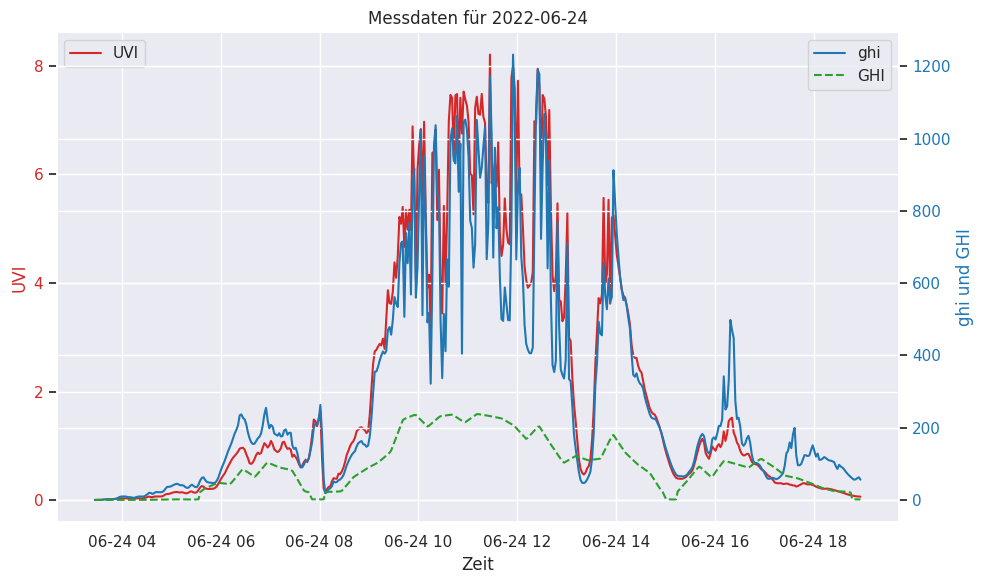

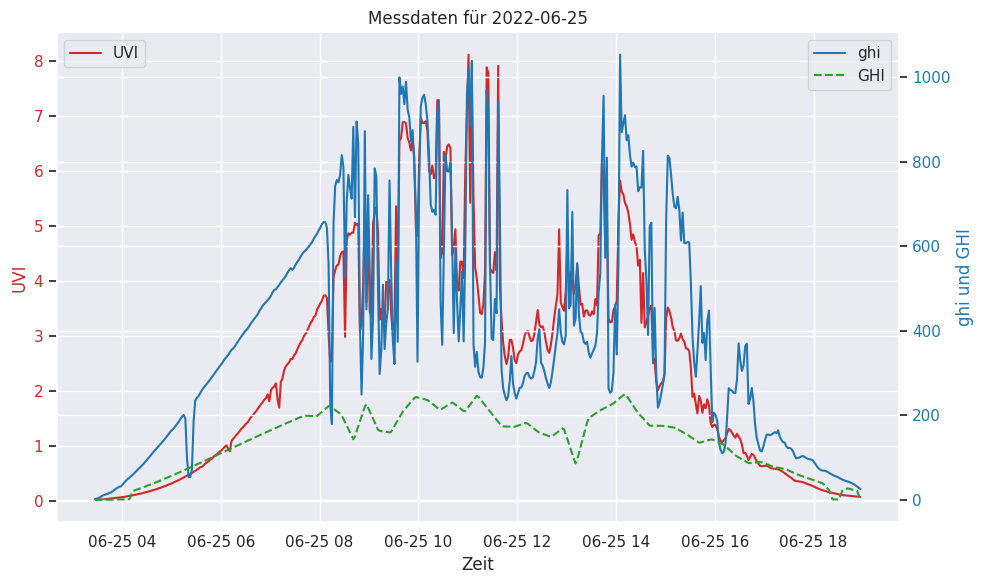

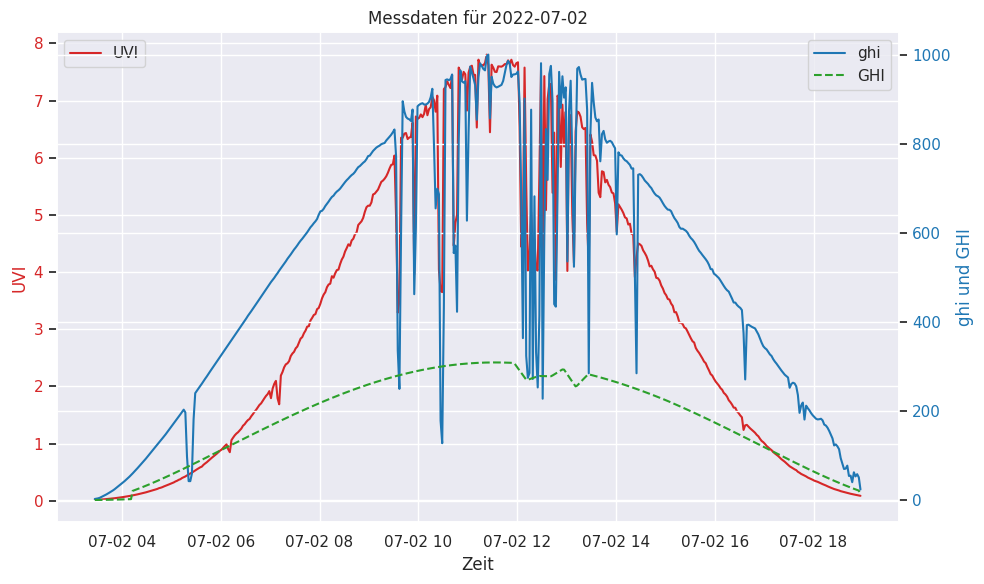

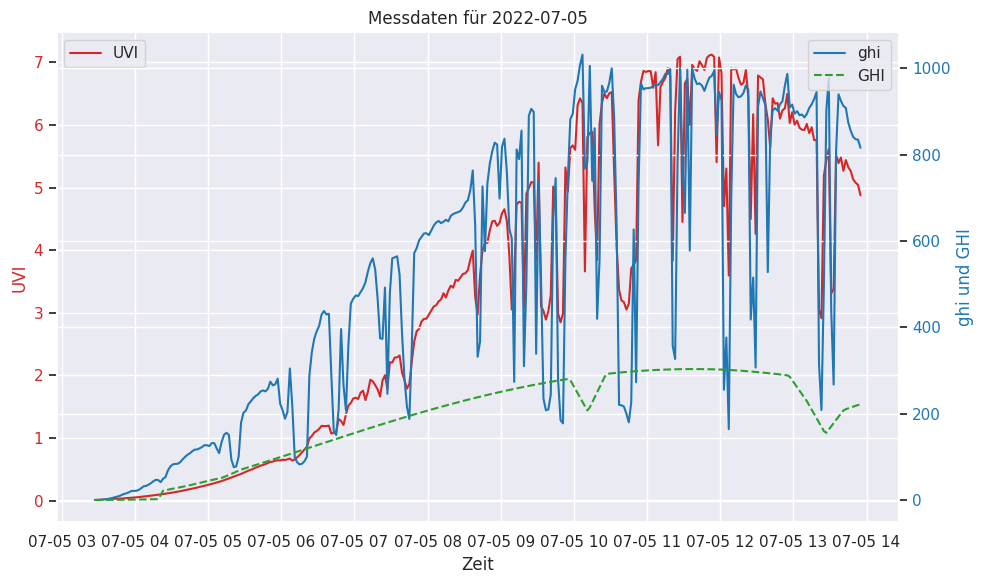

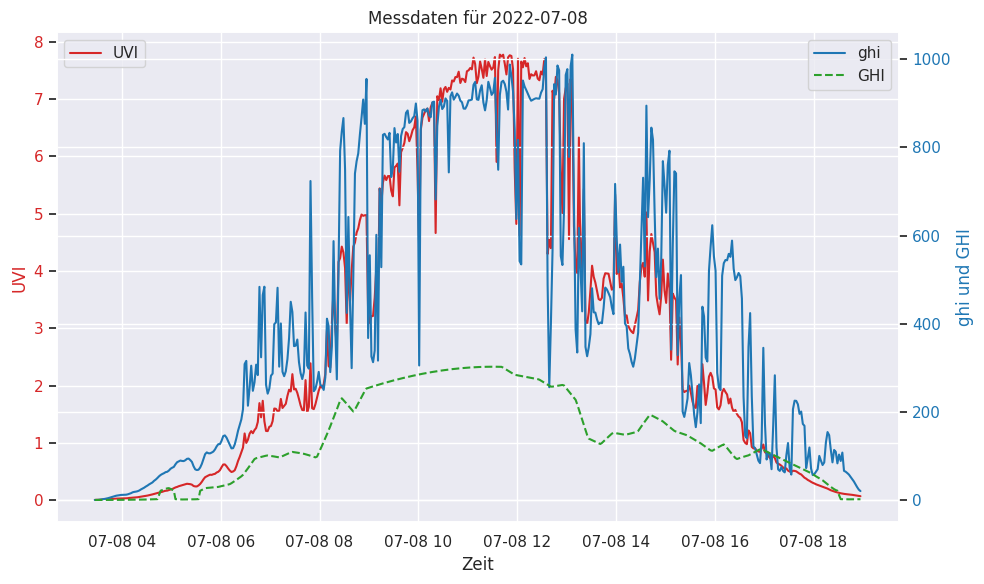

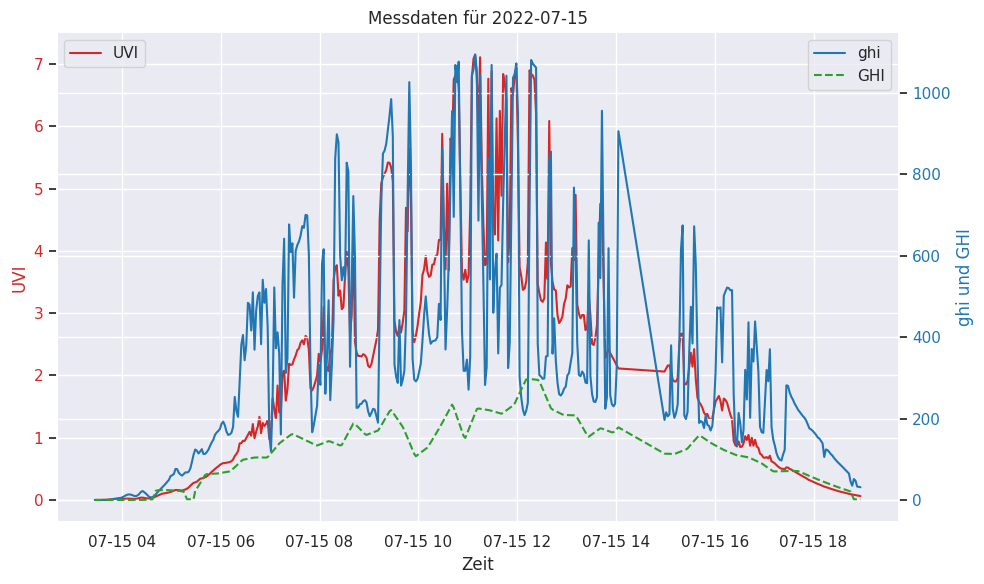

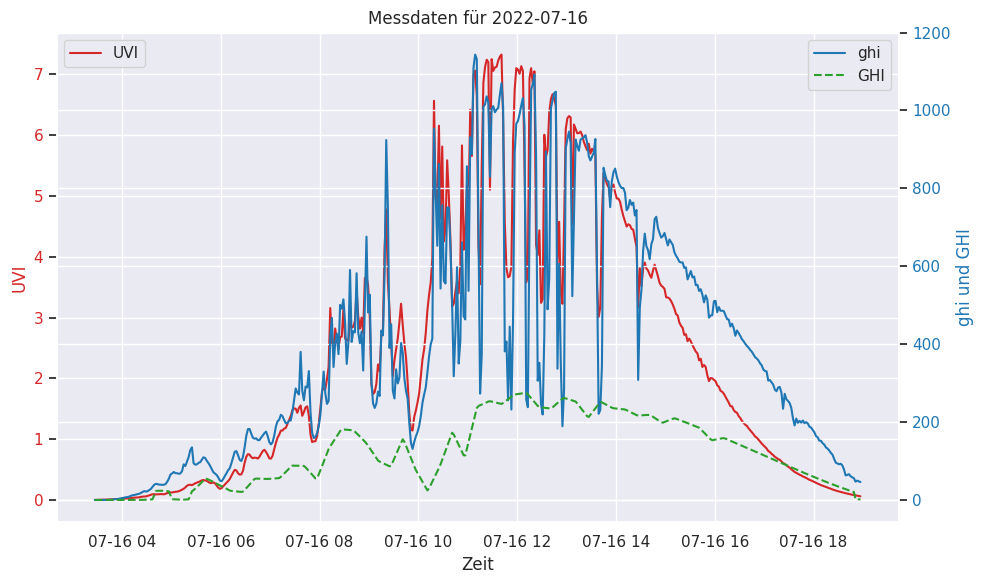

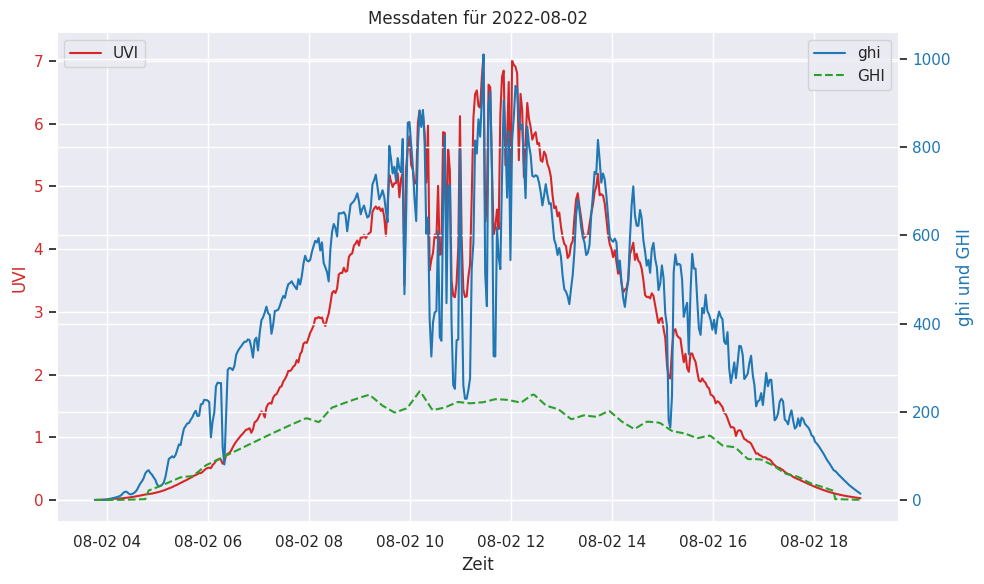

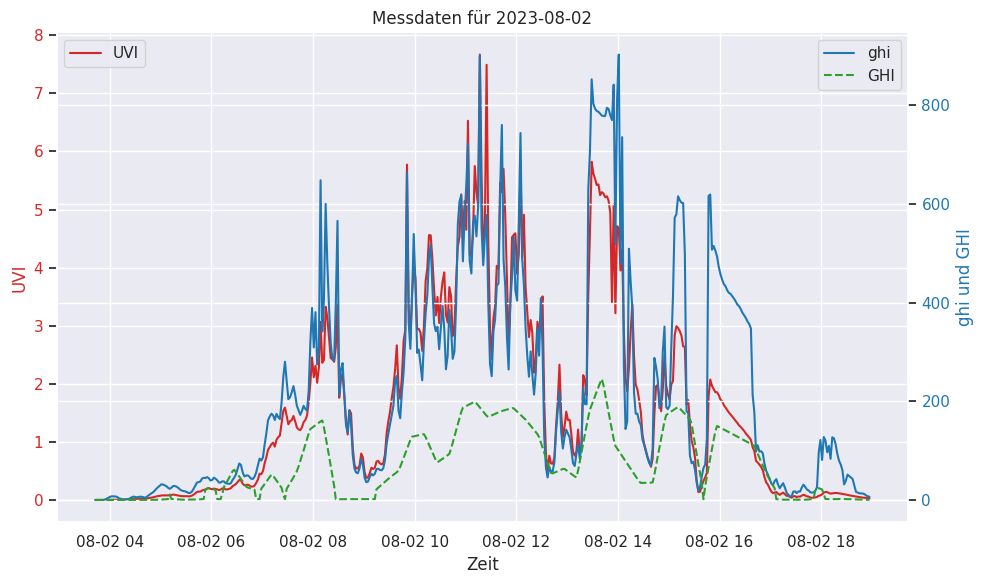

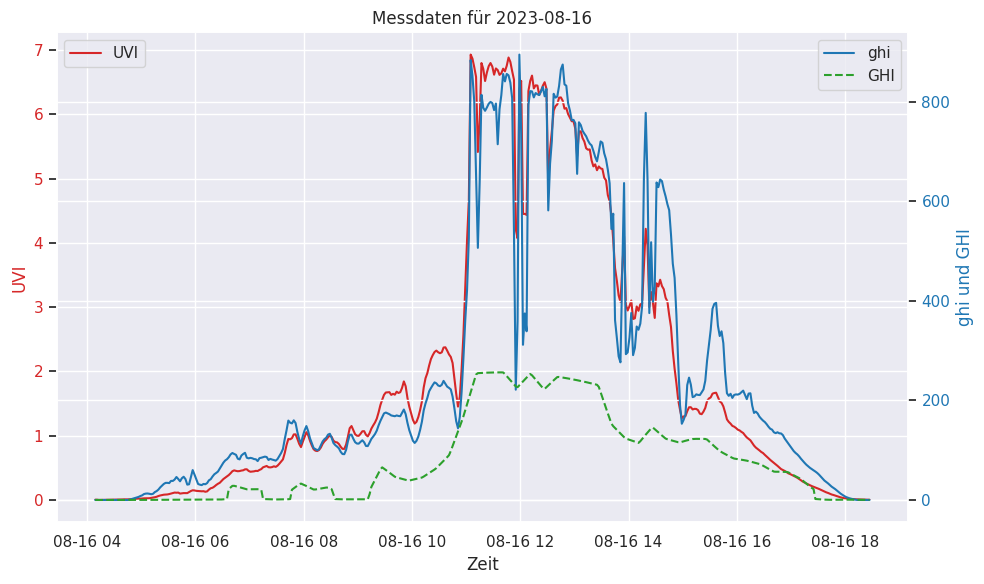

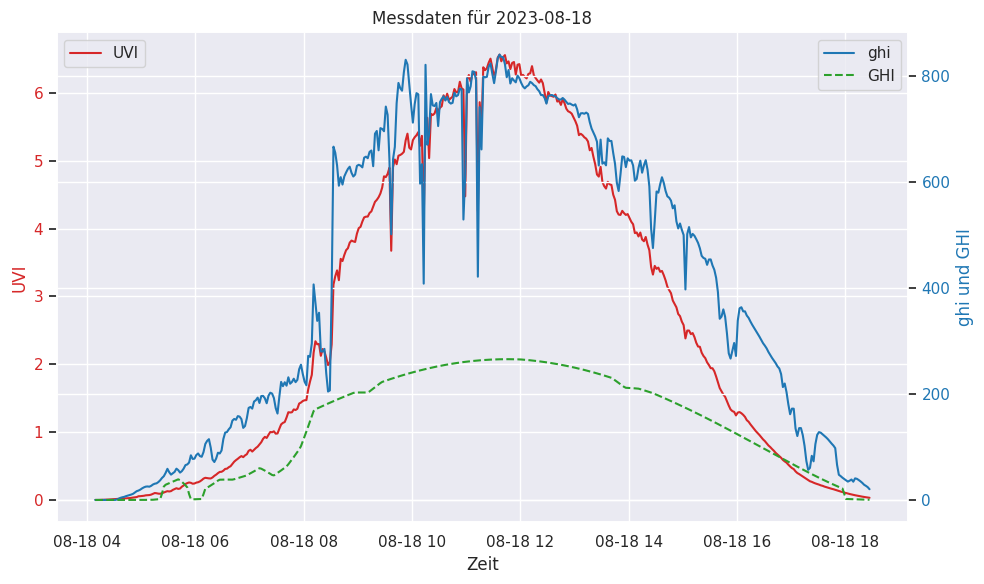

In [114]:
plot_measurements_for_each_day(filter_rows_by_values(df_Messwerte, 'UVI', 6, 'ghi', 600), df_Messwerte, 'UVI', 'ghi', 'GHI')

In [109]:
bdf_Messwerte

,Unnamed: 0,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,...,SZA,time_sin,time_cos,date_sin,date_cos,Date,Hour,SZA_bins,Time_bins,Zeitstempel
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-15 07:21:00,10300,2022-06-15 07:21:00,188.748,154.357,188.748,154.3570,2.408378,4.686417,281.330695,0.060209,...,55.032236,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,50-60,06:00-09:00,2022-06-15 07:21:00
2022-06-15 07:23:00,10301,2022-06-15 07:23:00,190.480,155.933,190.480,155.9330,2.462381,4.793073,287.094062,0.061560,...,54.717711,0.935135,-0.354291,0.282051,-0.959399,2022-06-15,7,50-60,06:00-09:00,2022-06-15 07:23:00
2022-06-15 07:25:00,10302,2022-06-15 07:25:00,192.206,157.504,192.206,157.5040,2.479048,4.817792,288.902613,0.061976,...,54.403414,0.932008,-0.362438,0.282051,-0.959399,2022-06-15,7,50-60,06:00-09:00,2022-06-15 07:25:00
2022-06-15 07:27:00,10303,2022-06-15 07:27:00,193.924,159.068,193.924,159.0680,2.543531,4.953151,292.450776,0.063588,...,54.089361,0.928810,-0.370557,0.282051,-0.959399,2022-06-15,7,50-60,06:00-09:00,2022-06-15 07:27:00
2022-06-15 07:29:00,10304,2022-06-15 07:29:00,195.635,160.627,195.635,160.6270,2.576485,5.016957,295.552724,0.064412,...,53.775570,0.925541,-0.378649,0.282051,-0.959399,2022-06-15,7,50-60,06:00-09:00,2022-06-15 07:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19 05:49:00,319854,2023-08-19 05:49:00,49.511,27.370,21.515,0.4624,0.306965,0.383479,77.133209,0.007674,...,77.879716,0.998630,0.052336,-0.739447,-0.673215,2023-08-19,5,70-80,03:00-06:00,2023-08-19 05:49:00
2023-08-19 05:51:00,319855,2023-08-19 05:51:00,51.239,28.658,26.652,0.6105,0.312439,0.401176,76.895074,0.007811,...,77.565367,0.999048,0.043619,-0.739447,-0.673215,2023-08-19,5,70-80,03:00-06:00,2023-08-19 05:51:00
2023-08-19 05:53:00,319856,2023-08-19 05:53:00,52.976,29.964,32.092,0.7705,0.314239,0.414659,75.176522,0.007856,...,77.250829,0.999391,0.034899,-0.739447,-0.673215,2023-08-19,5,70-80,03:00-06:00,2023-08-19 05:53:00


In [67]:
df_SolUVI_drop2 = df_Messwerte

bin_edges = [25, 40, 50, 60, 70, 80, 100]
df_SolUVI_drop2['SZA_bins'] = pd.cut(df_SolUVI_drop2['SZA'], bins=bin_edges, labels = ['25-40', '40-50', '50-60', '60-70', '70-80', '80-100'])

### Korrelation zwischen dem UVI und der

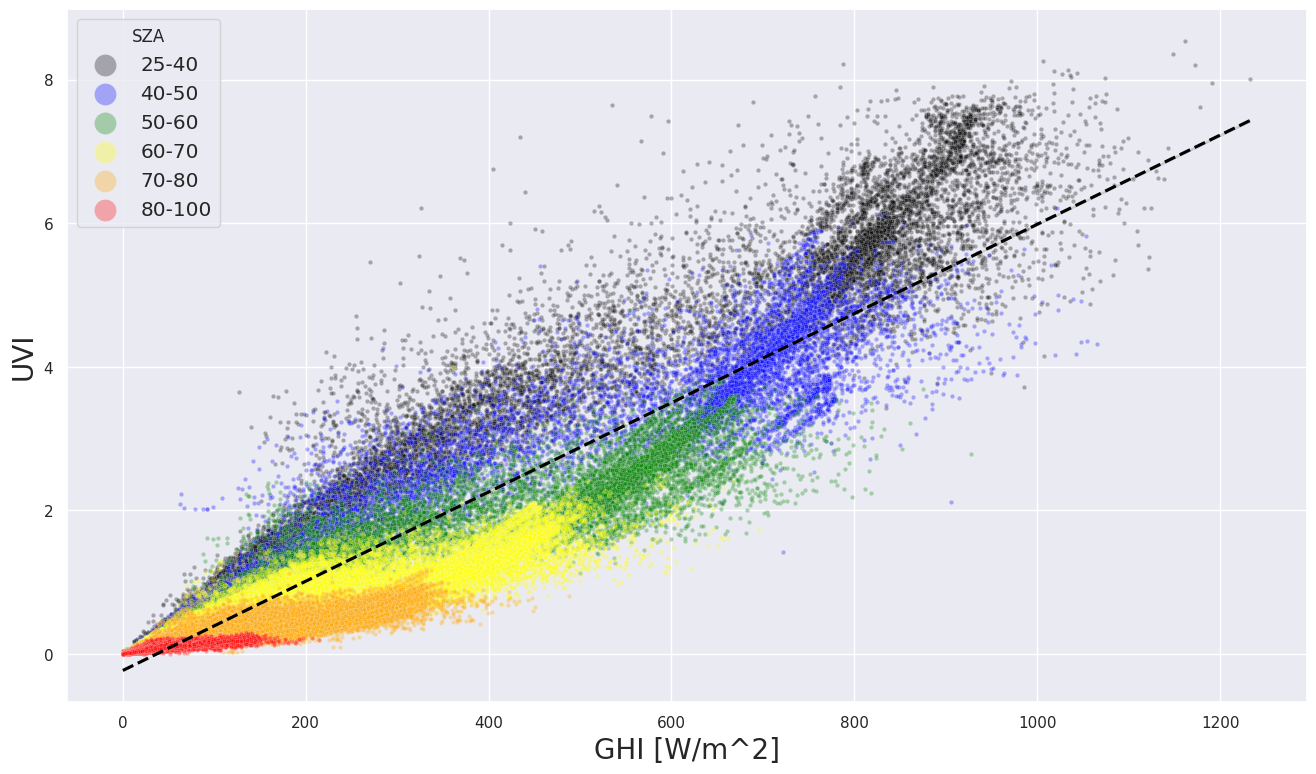

In [76]:
plt.figure(figsize=(16, 9), dpi=100)

colors = ['black', 'blue', 'green', 'yellow', 'orange', 'red']
labels = ['25-40', '40-50', '50-60', '60-70', '70-80', '80-100']

# Sicherstellen, dass die Reihenfolge der Bins und Farben erhalten bleibt
for label, color in zip(labels, colors):
    subset = df_SolUVI_drop2[df_SolUVI_drop2['SZA_bins'] == label]
    sns.scatterplot(data=subset, x='ghi', y='UVI', marker='o', color=color, label=label, s=10, alpha=.3)

# Hinzufügen der Regressionslinie ohne Scatter
sns.regplot(data=df_SolUVI_drop2, x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, scatter=False)

plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)

plt.legend(title='SZA', scatterpoints=1, fontsize='large', markerscale=5)

plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI.png')
plt.show()
plt.close()

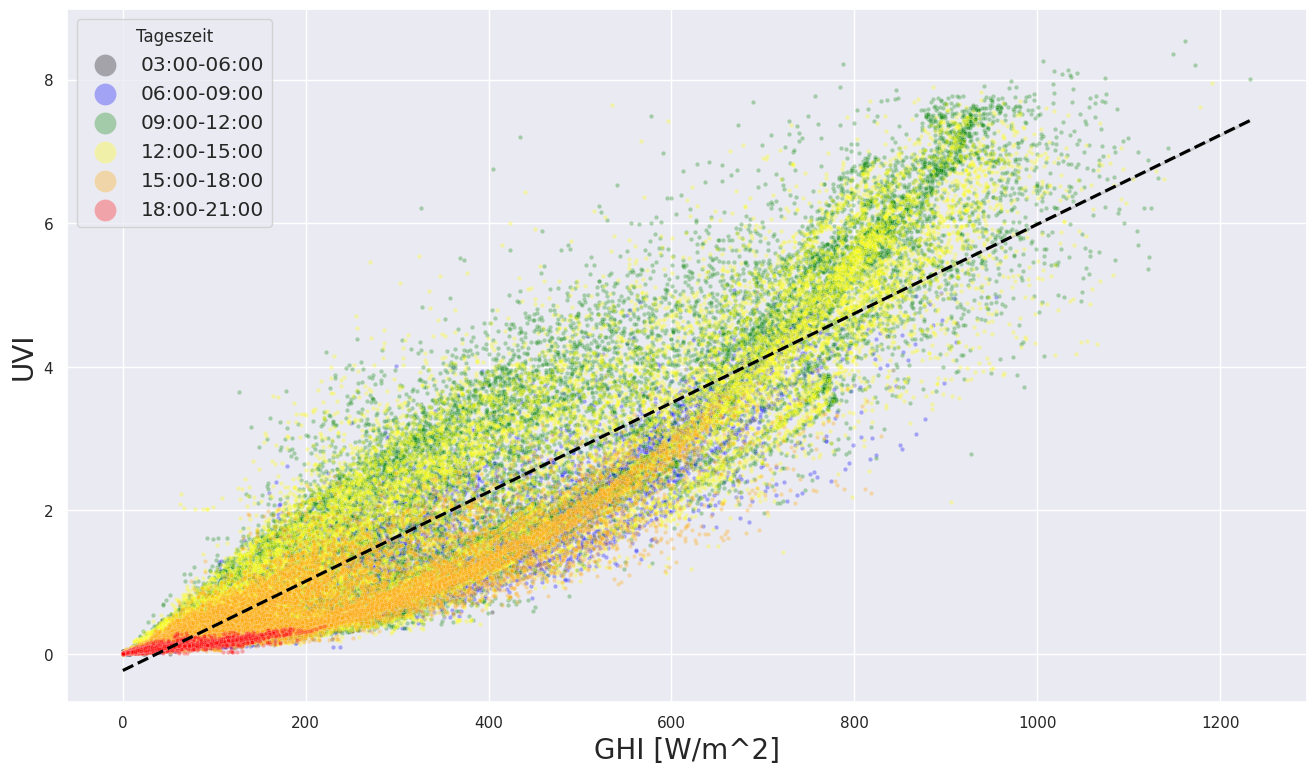

In [77]:
# Schritt 1: Stunden aus dem DateTimeIndex extrahieren
df_SolUVI_drop3 = df_Messwerte

df_SolUVI_drop3['Hour'] = df_SolUVI_drop3.index.hour
colors = ['black', 'blue', 'green', 'yellow', 'orange', 'red']

# Schritt 2: Einteilung der Stunden in Bins
# Hinweis: Die Bins müssen für die Stundenverteilung über den Tag angepasst werden
hour_bins = [3, 6, 9, 12, 15, 18, 21]  # Beispiel für mögliche Bins
hour_labels = ['03:00-06:00', '06:00-09:00', '09:00-12:00', '12:00-15:00', '15:00-18:00', '18:00-21:00']
df_SolUVI_drop3['Time_bins'] = pd.cut(df_SolUVI_drop3['Hour'], bins=hour_bins, labels=hour_labels, right=False)

plt.figure(figsize=(16, 9), dpi=100)

# Schritt 3: Scatterplots für jede Uhrzeit-Kategorie

for label, color in zip(hour_labels, colors):
    subset = df_SolUVI_drop3[df_SolUVI_drop3['Time_bins'] == label]
    sns.scatterplot(data=subset, x='ghi', y='UVI', marker='o', color=color, label=label, s=10, alpha=.3)

# Hinzufügen der Regressionslinie ohne Scatter
sns.regplot(data=df_SolUVI_drop3, x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, scatter=False)

plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)

plt.legend(title = 'Tageszeit', scatterpoints=1, fontsize='large', markerscale=5)

# Speichern vor der Anzeige
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI_time.png')
plt.show()
plt.close()

In [70]:
def erweitere_dataframe(df_stuendlich, df_minuetlich, spalten_stuendlich, spalten_minuetlich):
    # Extrahiere die spezifizierten Spalten, plus sicherstellen, dass der Zeitstempel enthalten ist
    if isinstance(df_stuendlich.index, pd.DatetimeIndex):
        df_stuendlich['Zeitstempel'] = df_stuendlich.index
    df_stuendlich = df_stuendlich[['Zeitstempel'] + spalten_stuendlich]

    if isinstance(df_minuetlich.index, pd.DatetimeIndex):
        df_minuetlich['Zeitstempel'] = df_minuetlich.index
    df_minuetlich = df_minuetlich[['Zeitstempel'] + spalten_minuetlich]

    # Sortiere beide Dataframes nach Zeitstempel
    df_stuendlich = df_stuendlich.sort_values(by='Zeitstempel')
    df_minuetlich = df_minuetlich.sort_values(by='Zeitstempel')

    # Verwende merge_asof, um sie basierend auf dem Zeitstempel zu verbinden
    erweiterte_df = pd.merge_asof(df_minuetlich, df_stuendlich, on='Zeitstempel', direction='backward')
    erweiterte_df.set_index('Zeitstempel', inplace=True)

    return erweiterte_df

In [79]:
df_SolUVI_erweitert = []
spalten_stuendlich = ['index_stein', 'index_coimbra', 'index_sigma']
spalten_minuetlich = [ 'UVI', 'ghi']

df_SolUVI_erweitert = erweitere_dataframe(df_Vorhersage, df_Messwerte, spalten_stuendlich, spalten_minuetlich)

In [ ]:
sns.histplot(df_Vorhersage['index_stein'], kde=True, bins=20, color='blue', edgecolor='black')

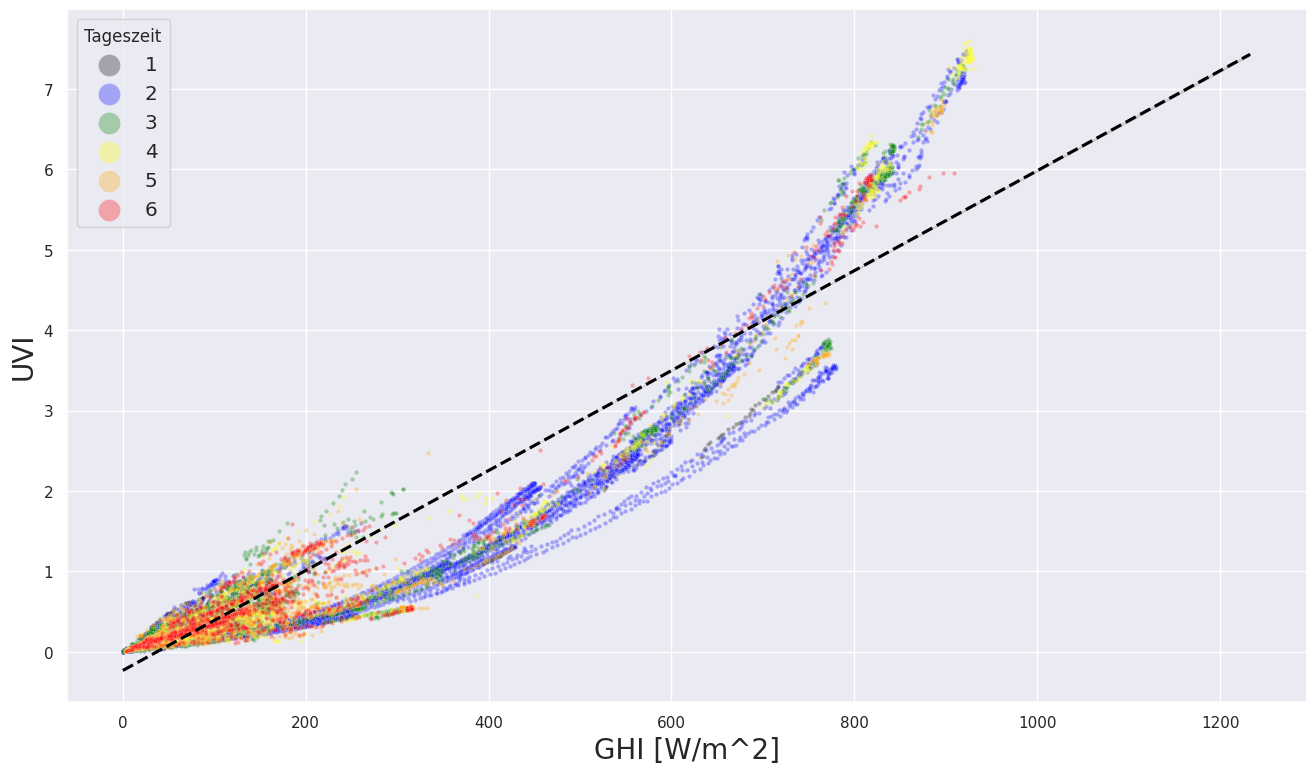

In [83]:
# Schritt 1: Stunden aus dem DateTimeIndex extrahieren
colors = ['black', 'blue', 'green', 'yellow', 'orange', 'red']

# Schritt 2: Einteilung der Stunden in Bins
# Hinweis: Die Bins müssen für die Stundenverteilung über den Tag angepasst werden
#index_bins = [0, 2, 4, 8, 16, 32, 64]  # Beispiel für mögliche Bins
index_bins = [0, 1, 1.5, 2, 2.5, 3, 3.5]
index_labels = ['1', '2', '3', '4', '5', '6']

df_SolUVI_erweitert['index_bins'] = pd.cut(df_SolUVI_erweitert['index_stein'], bins = index_bins, labels = index_labels, right = False)

plt.figure(figsize=(16, 9), dpi=100)

# Schritt 3: Scatterplots für jede Uhrzeit-Kategorie

for label, color in zip(index_labels, colors):
    subset = df_SolUVI_erweitert[df_SolUVI_erweitert['index_bins'] == label]
    sns.scatterplot(data=subset, x='ghi', y='UVI', marker='o', color=color, label=label, s=10, alpha=.3)

# Hinzufügen der Regressionslinie ohne Scatter
sns.regplot(data=df_SolUVI_erweitert, x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, scatter=False)

plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)

plt.legend(title = 'Tageszeit', scatterpoints=1, fontsize='large', markerscale=5)

# Speichern vor der Anzeige
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI_Index.png')
plt.show()
plt.close()

In [84]:
df_SolUVI_erweitert['index_bins'] = df_SolUVI_erweitert['index_bins'].astype(float)

In [85]:
df_SolUVI_erweitert.dropna(inplace = True)

In [87]:
coefficients = np.polyfit(df_SolUVI_erweitert['ghi'][df_SolUVI_erweitert['index_bins'] == 2], df_SolUVI_erweitert['UVI'][df_SolUVI_erweitert['index_bins'] == 2], 3)
poly = np.poly1d(coefficients)
x = np.linspace(0, df_SolUVI_erweitert['ghi'].max(), num=100)  # Ersetze 'start' und 'end' durch den Bereich deiner Daten
y = poly(x)

In [88]:
poly

poly1d([ 7.24223590e-09, -6.23013914e-07,  2.32668015e-03,  5.51276158e-02])

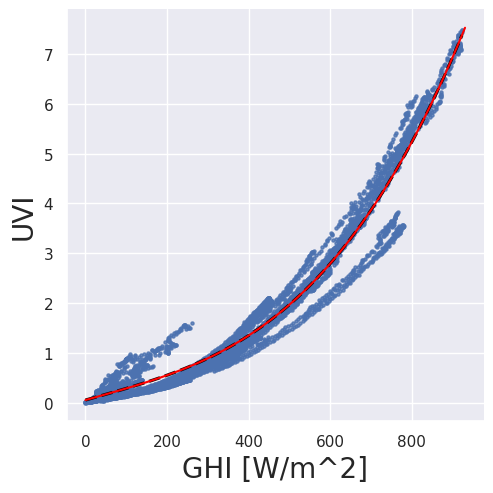

In [89]:
sns.lmplot(data=df_SolUVI_erweitert[df_SolUVI_erweitert['index_bins'] == 2], x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, order=3, ci=None, scatter_kws={'s': 5})
plt.plot(x, y, color='red')

plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI_FitFunktion.png')
plt.show()
plt.close()

**Korrelation zwischen der Globalstrahlung und dem UVI. Mit Bezug auf den total cloud cover**

In [94]:
def merge_dataframes_on_index(df1, df2):

    merged_df = df1.join(df2, how='inner')

    return merged_df

In [100]:
df_hourly = merge_dataframes_on_index(df_Vorhersage, df_Messwerte_hourly)

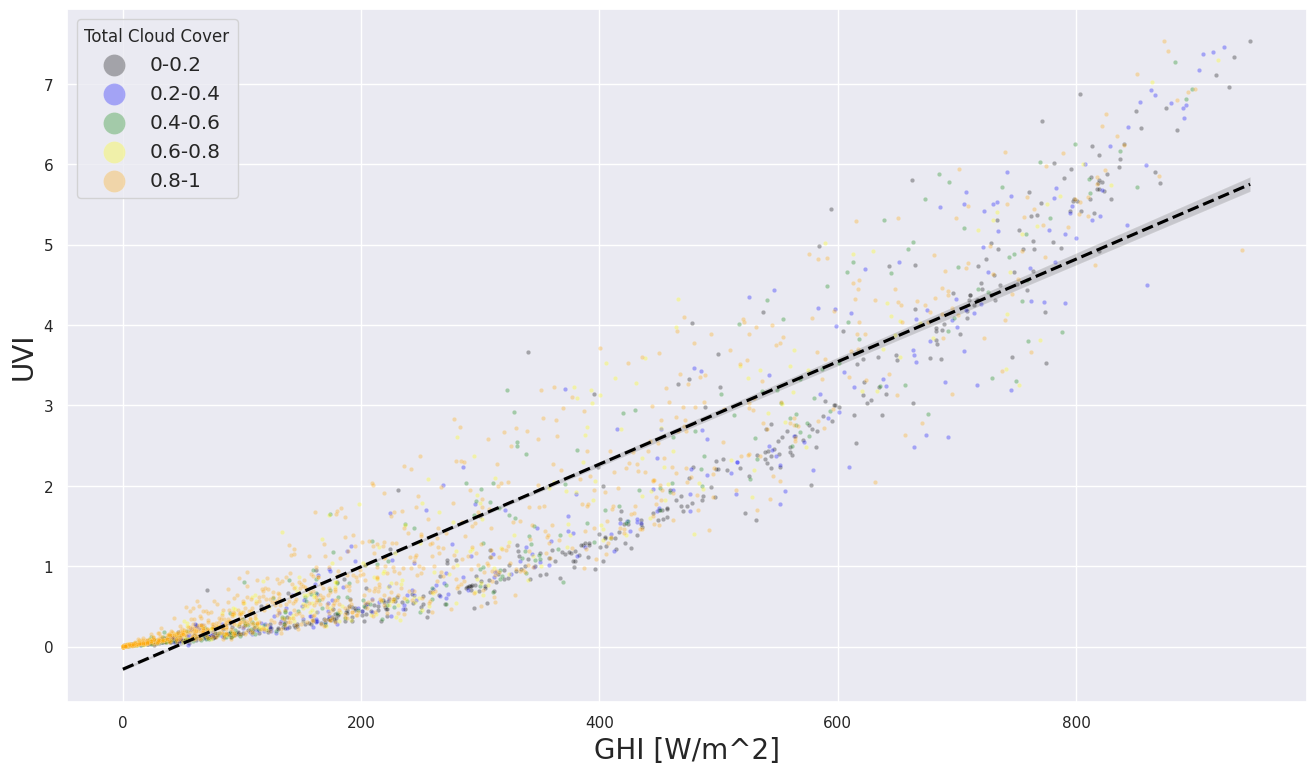

In [101]:
# Schritt 1: Stunden aus dem DateTimeIndex extrahieren
colors = ['black', 'blue', 'green', 'yellow', 'orange', 'red']

# Schritt 2: Einteilung der Stunden in Bins
# Hinweis: Die Bins müssen für die Stundenverteilung über den Tag angepasst werden
#index_bins = [0, 2, 4, 8, 16, 32, 64]  # Beispiel für mögliche Bins
index_bins = [0, .2, .4, .6, .8, 1]
index_labels = ['0-0.2','0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df_hourly['index_bins'] = pd.cut(df_hourly['tcc'], bins = index_bins, labels = index_labels, right = False)

plt.figure(figsize=(16, 9), dpi=100)

# Schritt 3: Scatterplots für jede Uhrzeit-Kategorie

for label, color in zip(index_labels, colors):
    subset = df_hourly[df_hourly['index_bins'] == label]
    sns.scatterplot(data=subset, x='ghi', y='UVI', marker='o', color=color, label=label, s=10, alpha=.3)

# Hinzufügen der Regressionslinie ohne Scatter
sns.regplot(data=df_hourly, x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, scatter=False)

plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)

plt.legend(title = 'Total Cloud Cover', scatterpoints=1, fontsize='large', markerscale=5)

# Speichern vor der Anzeige
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI_Index.png')
plt.show()
plt.close()

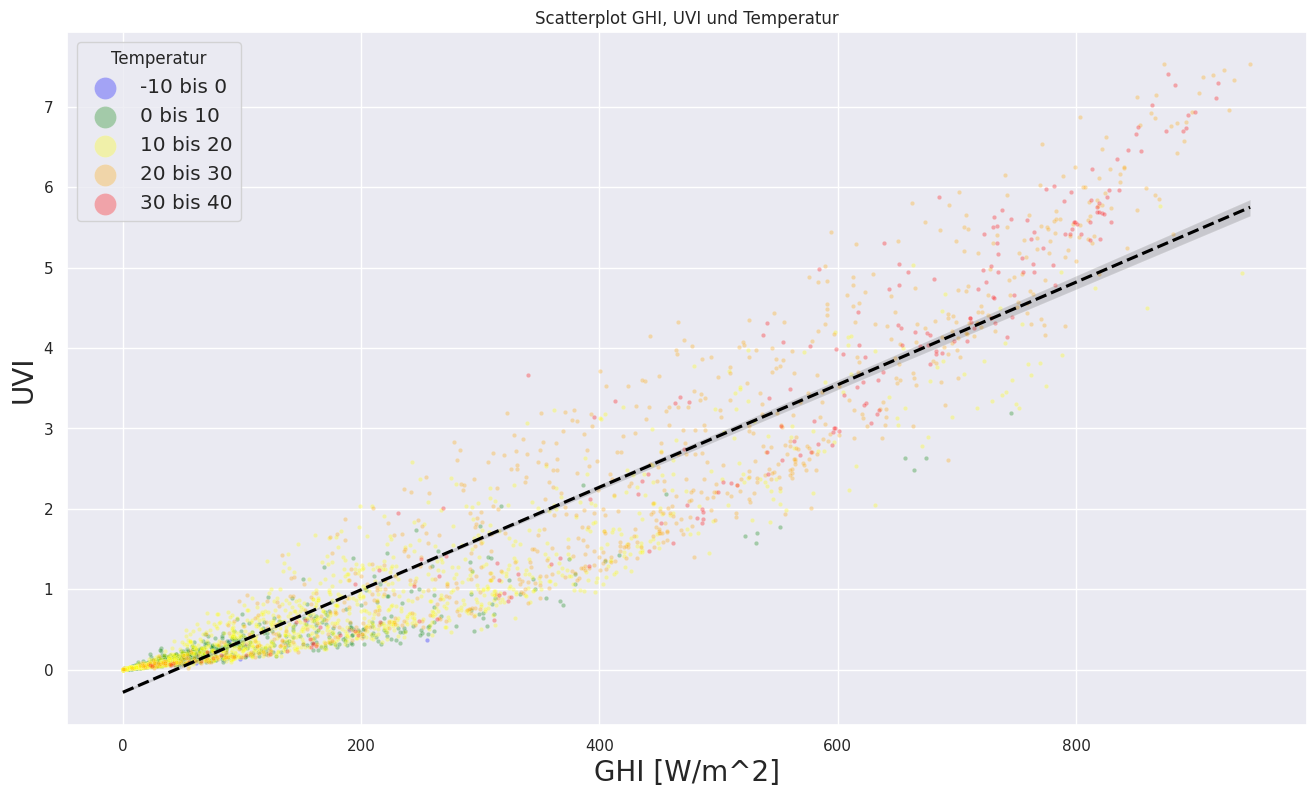

In [102]:
# Schritt 1: Stunden aus dem DateTimeIndex extrahieren
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Schritt 2: Einteilung der Stunden in Bins
# Hinweis: Die Bins müssen für die Stundenverteilung über den Tag angepasst werden
#index_bins = [0, 2, 4, 8, 16, 32, 64]  # Beispiel für mögliche Bins
index_bins = [-10, 0, 10, 20, 30, 40]
index_labels = ['-10 bis 0', '0 bis 10', '10 bis 20', '20 bis 30', '30 bis 40']

df_hourly['index_bins'] = pd.cut(df_hourly['Temp'], bins = index_bins, labels = index_labels, right = False)

plt.figure(figsize=(16, 9), dpi=100)

# Schritt 3: Scatterplots für jede Uhrzeit-Kategorie

for label, color in zip(index_labels, colors):
    subset = df_hourly[df_hourly['index_bins'] == label]
    sns.scatterplot(data=subset, x='ghi', y='UVI', marker='o', color=color, label=label, s=10, alpha=.3)

# Hinzufügen der Regressionslinie ohne Scatter
sns.regplot(data=df_hourly, x='ghi', y='UVI', line_kws={'color': 'black', 'linestyle': '--'}, scatter=False)

plt.title("Scatterplot GHI, UVI und Temperatur")
plt.xlabel("GHI [W/m^2]", fontsize=20)
plt.ylabel("UVI", fontsize=20)

plt.legend(title = 'Temperatur', scatterpoints=1, fontsize='large', markerscale=5)

# Speichern vor der Anzeige
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Korrelation_UVI_GHI_Temp.png')
plt.show()
plt.close()

## Finden von Nullwerten in den UVI-Daten:

In [103]:
# Zeilen an denen die Solys Daten NaN-Einträge besitzen
df_Messwerte[df_Messwerte.isnull().any(axis=1)]

,Unnamed: 0,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,...,SZA,time_sin,time_cos,date_sin,date_cos,Date,Hour,SZA_bins,Time_bins,Zeitstempel
Datetime,,,,,,,,,,,,,,,,,,,,,


## Korrelation zwischen der Globalstrahlungsvorhersage, den Globalstrahlungsmessungen und dem gemessenen UVI: